/home/pi/sage/local/lib/python2.7/site-packages/scipy/io/wavfile.py:129: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = numpy.fromstring(fid.read(size), dtype=dtype)


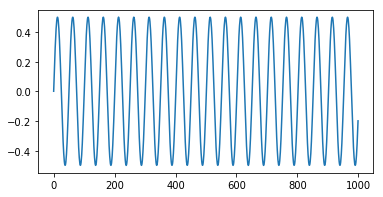

In [1]:
from __future__ import division,print_function, absolute_import
import struct,librosa  
import numpy as np
from IPython.display import Audio
def wavPlayer(data, rate):
    display(Audio(data, rate=rate))
from matplotlib import pyplot as plt
from scipy.io import wavfile
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,3)
sr = 22050 # sample rate
T = 2.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False)
x = 0.5*np.sin(2*np.pi*440*t) 
librosa.output.write_wav('la440.wav', x, sr)
samplerate,data=wavfile.read("la440.wav")
times=np.arange(len(data))/float(samplerate)
plt.plot(data[:1000]);
Audio(x, rate=sr)

In [2]:
from pyknon.genmidi import Midi
from pyknon.music import NoteSeq,Note
melody=[10,10,11,13,13,11,10,8,4,3]
def makeMidi(notes,name,filename="tune1.midi"):
    notes1=map(Note,notes)
    midi=Midi(1,tempo=90)
    midi.seq_notes(notes1,track=0)
    midi.write(filename)
makeMidi(melody,"Melody1")
from music21 import *
from music21 import midi
environment.UserSettings()['warnings'] = 0
def playMidi(filename):
    mf=midi.MidiFile()  
    mf.open(filename)
    mf.read()
    mf.close()
    s=midi.translate.midiFileToStream(mf)
    s.show("midi")

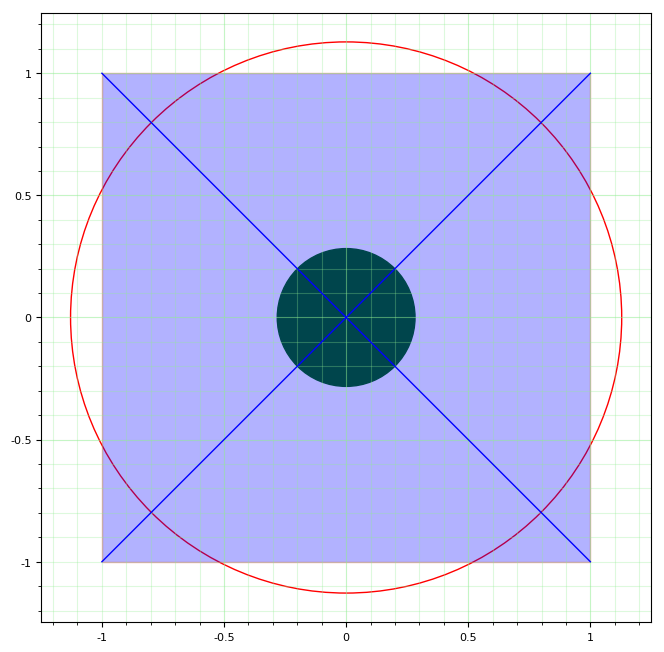

In [3]:
reset()
r=sqrt(4.0/n(pi));r
f=x;a=plot(x);b=plot(-x)
po = polygon(((-1,-1),(-1,1),
              (1,1),(1,-1)),color="blue",
             edgecolor="red",thickness=1,
             alpha=0.3)
cr = circle((0,0),r,color="red",
            zorder=-5,thickness=1)
co = circle((0,0),r/4,color="darkgreen",
            zorder=-5,thickness=1,fill=True)
show(cr+co+a+b+po,
     xmin=-1.2,xmax=1.2,ymin=-1.2,ymax=1.2,
     gridlines="minor",
     gridlinesstyle=dict(color="lightgreen",
                         linestyle="-",alpha=0.3),
     axes=False,frame=True,figsize=10,fontsize=8)

In [4]:
from music21 import *
environment.UserSettings()['lilypondPath']='/usr/local/bin/lilypond'
environment.set('pdfPath','/usr/bin/musescore')
environment.set('graphicsPath','/usr/local/bin/lilypond')

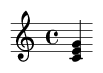

In [5]:
c=chord.Chord("C4 E4 G4")
c.isConsonant()
c.write("lily.png")
c.show("lily.png")
from IPython.display import Image,Audio
Image(filename=c.write('lily.png'))

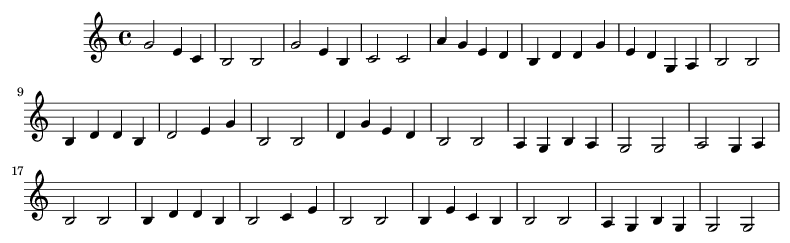

In [6]:
s=converter.parse('mid/satin.mid')
Image(filename=s.write('lily.png'))

In [7]:
from midi2audio import FluidSynth
fs=FluidSynth()
fs.midi_to_audio("mid/avril.midi", 'avril.wav')

In [8]:
from midi2audio import FluidSynth
FluidSynth().midi_to_audio('piano.wav', 'piano.midi')
#samplerate,data=wavfile.read("tune1.wav")
#times=np.arange(len(data))/float(samplerate)
#plt.plot(data[:10000]);
#Audio(x, rate=sr)

In [9]:
from __future__ import division
import sys
import argparse
import numpy as np, matplotlib.pyplot as plt
import pretty_midi
import librosa
import itertools
from IPython.display import Audio,display
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,3)

In [15]:
#midi_fn = 'mid/Avril14th.mid'
midi_fn = 'mid/satin.mid'
sr = 22050
pm = pretty_midi.PrettyMIDI(midi_fn)
y = pm.fluidsynth(fs=sr)[:sr*50]
display(Audio(y,rate=sr))


In [16]:
librosa.output.write_wav('satin.wav', y, sr)

In [17]:
Audio(y, rate=sr)

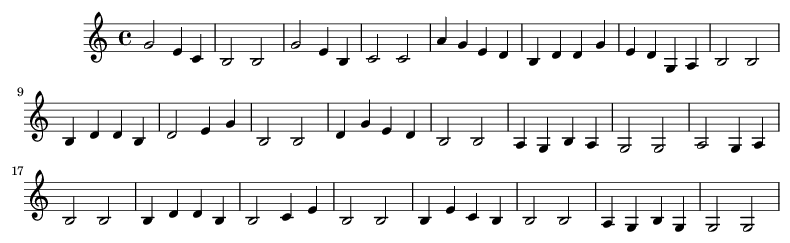

In [21]:
s=converter.parse('mid/satin.mid')
Image(filename=s.write('lily.png'))